In [10]:
# Check all important packages can be imported
import matplotlib.pyplot as plt
import mat73
import pynwb
import sys

In [11]:

sys.path.append("../python") # Add the path to the python directory
from LoadMatData import load_mat_file

original_experiment_id = "HG13__180827_12_28_17"

mat_file = f"../data/{original_experiment_id}.mat"

# Load the .mat file
neuron_df_f, neuron_times, speed, whisker_motion_index, state, pca_dff, puff_events, = load_mat_file(mat_file)


Loading data from: ../data/HG13__180827_12_28_17.mat
Variables in the .mat file: dict_keys(['allAnalysed', 'allData', 'allEvents'])
Neuron data (shape: (41, 14280))
Neuron times data (shape: (41, 14280))
Speed data (shape: (2, 186450))
Whisker motion index data (shape: (2, 120361))
State data (shape: (2, 120361))
PCA of dF/F data (shape: (9, 14280))
Puff event data (shape: (2, 20))


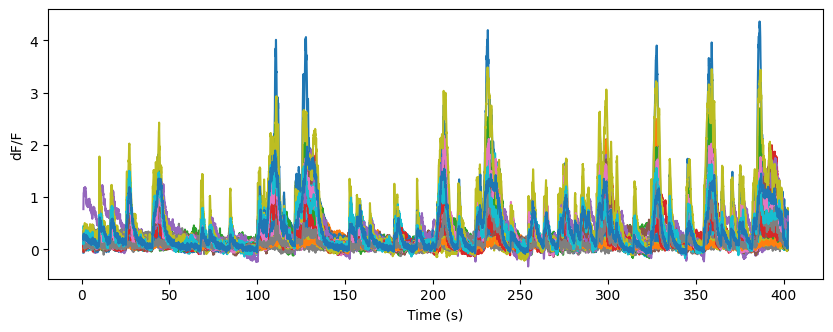

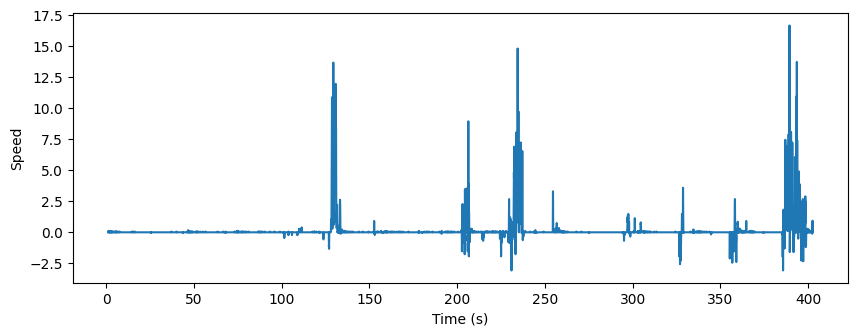

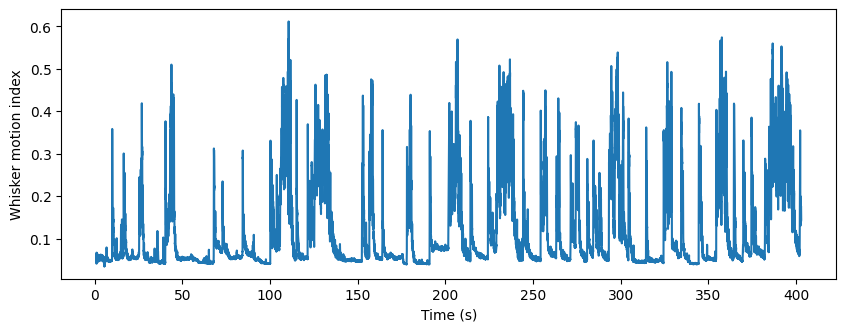

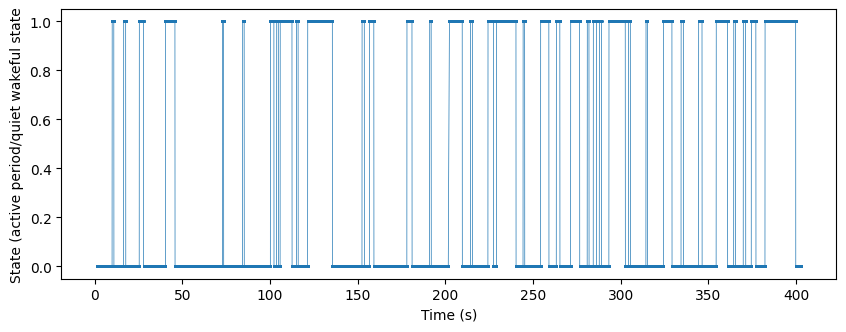

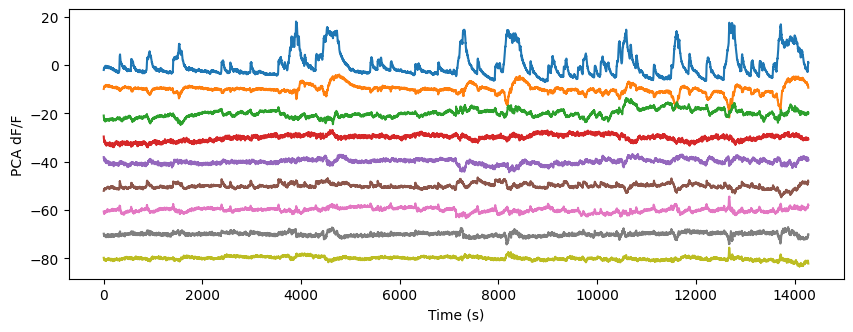

In [12]:
figsize=(10, 3.5)
plt.figure(figsize=figsize)

plt.xlabel("Time (s)")
plt.ylabel("dF/F")

for index in range(len(neuron_df_f)):
    plt.plot([t / 1000 for t in neuron_times[index]], neuron_df_f[index])

plt.figure(figsize=figsize)
plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.plot([t / 1000 for t in speed[0]], speed[1])

plt.figure(figsize=figsize)
plt.xlabel("Time (s)")
plt.ylabel("Whisker motion index")
plt.plot([t / 1000 for t in whisker_motion_index[0]], whisker_motion_index[1])

plt.figure(figsize=figsize)
plt.xlabel("Time (s)")
plt.ylabel("State (active period/quiet wakeful state")
plt.plot(
    [t / 1000 for t in state[0]], state[1], linewidth=0.5, marker=".", markersize=2
)

plt.figure(figsize=figsize)

plt.xlabel("Time (s)")
plt.ylabel("PCA dF/F")

for index in range(len(pca_dff)):
    plt.plot(pca_dff[index] + index * -10, label=f"PC {index+1}")

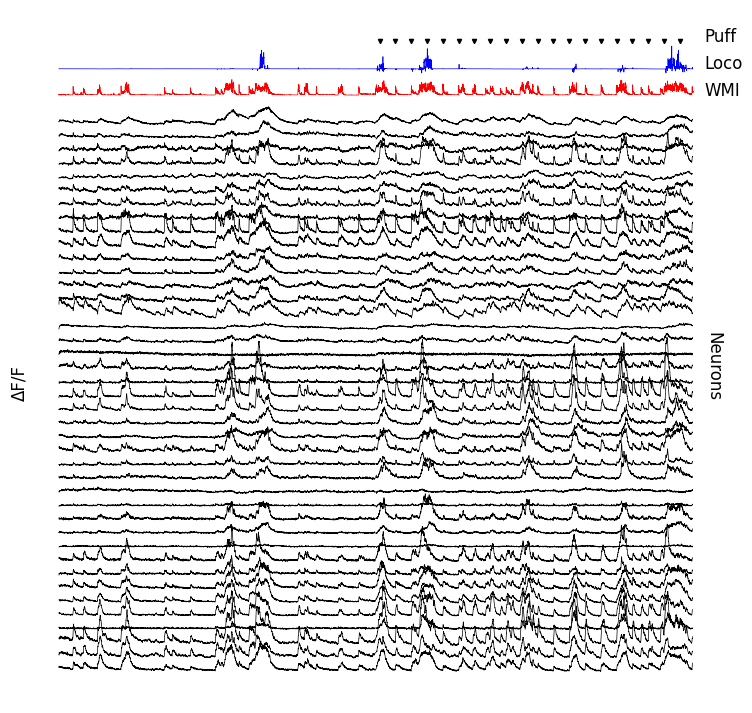

In [15]:
fig, ax = plt.subplots(figsize=(9, 9))

plt.xlabel("Time (s)")
plt.ylabel("dF/F")

ax.set_axis_off()

offset = 1
for index in range(len(neuron_df_f)):
    plt.plot(
        [t / 1000 for t in neuron_times[index]],
        neuron_df_f[index] - index*offset,
        color="black",
        linewidth=0.5,
    )

plt.text(
    -30,
    -20,
    "ΔF/F",
    rotation=90,
    fontsize=12,
)
plt.text(
    410,
    -20,
    "Neurons",
    rotation=270,
    fontsize=12,
)

scale_wmi = 2
plt.plot([t / 1000 for t in whisker_motion_index[0]], whisker_motion_index[1]*scale_wmi+ 2*offset, color="red", linewidth=0.5)

plt.text(
    410,
    2,
    "WMI",
    fontsize=12,
)

scale_speed = 0.1
plt.plot([t / 1000 for t in speed[0]], speed[1]*scale_speed+ 4*offset, color="blue", linewidth=0.5)

plt.text(
    410,
    4,
    "Loco",
    fontsize=12,
)

if len(puff_events) > 0:
    for e in puff_events[0]:
        #print("Adding puff event at time %s" % (e / 1000))
        plt.plot(e / 1000, 6*offset, color="black", linestyle=None, marker="v", markersize=3)


plt.text(
    410,
    6,
    "Puff",
    fontsize=12,
)

plt.savefig(f"../data/Fig1D_{original_experiment_id}.png", dpi=300, bbox_inches="tight")